In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
involved_hebrew = pd.read_csv('../data/views_2019/views_2019/involved_hebrew.csv')
print(involved_hebrew.shape)
involved_hebrew.head().T

/home/jeffery/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (36,38,40,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1823550, 49)


,0,1,2,3,4
accident_id,2008002397,2008030316,2008068774,2008068774,2008073669
provider_and_id,12008002397,12008030316,12008068774,12008068774,12008073669
provider_code,1,1,1,1,1
file_type_police,NaN,NaN,NaN,NaN,NaN
involved_type,1,3,3,3,3
involved_type_hebrew,נהג,נפגע,נפגע,נפגע,נפגע
license_acquiring_date,2000,0,0,0,0
age_group,6,11,5,5,4
age_group_hebrew,25-29,50-54,20-24,20-24,15-19
sex,1,2,2,2,2


## Count of injured: per injury severity

In [9]:
print(involved_hebrew['injury_severity'].isnull().sum())
print(involved_hebrew['injury_severity'].value_counts())

0
3    1110998
0     685518
2      22852
1       4182
Name: injury_severity, dtype: int64


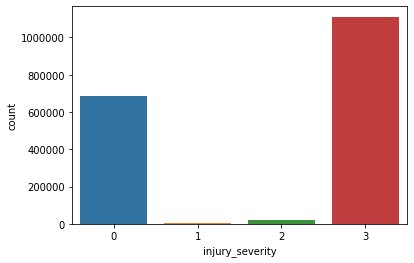

In [6]:
sns.countplot(x='injury_severity', data=involved_hebrew)
# Count of injured per injury severity

injury_severity
0    0.375925
1    0.002293
2    0.012532
3    0.609250
Name: accident_id, dtype: float64


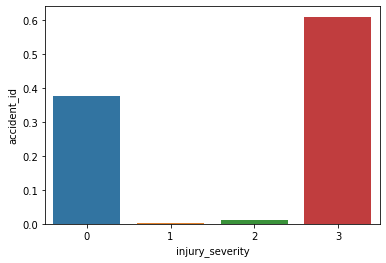

In [18]:
total_accidents = involved_hebrew.shape[0]
injury_severity_percentage = involved_hebrew.groupby('injury_severity')['accident_id'].count() / total_accidents
print(injury_severity_percentage)
sns.barplot(x=injury_severity_percentage.index, y=injury_severity_percentage)
# Count of injured per injury severity normalized

## Count of injured: inter/in-city

In [20]:
markers_hebrew = pd.read_csv('../data/views_2019/views_2019/markers_hebrew.csv')
markers_hebrew.head().T

,0,1,2,3,4
id,2009000007,2017006880,2009054349,2012000013,2019019112
provider_and_id,12009000007,32017006880,32009054349,12012000013,12019019112
provider_code,1,3,3,1,1
provider_code_hebrew,הלשכה המרכזית לסטטיסטיקה - סוג תיק 1,הלשכה המרכזית לסטטיסטיקה - סוג תיק 3,הלשכה המרכזית לסטטיסטיקה - סוג תיק 3,הלשכה המרכזית לסטטיסטיקה - סוג תיק 1,הלשכה המרכזית לסטטיסטיקה - סוג תיק 1
file_type_police,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...
geom,0101000020E6100000637BE6ECAA5F41401854619C93DF...,0101000020E6100000A0459C09B4524140434C48B9E7BD...,NaN,0101000020E610000063BA7185419C4140FB9A7A88FADE...,0101000020E61000001F00D68CADC9414014D611D46D9C...
longitude,34.7474,34.6461,NaN,35.2207,35.5756
latitude,31.8733,31.7418,NaN,31.871,33.2221
x,176203,166544,NaN,220993,254050


In [22]:
markers_hebrew['road_type'].head()
# 1,2 -> In-city, 3,4 -> Inter-city
# roads are only for inter-city data records 
# while streets are only for in-city

0    2
1    4
2    4
3    2
4    4
Name: road_type, dtype: int64

In [24]:
def inter_or_in_city(road_type):
    # 0 is in-city, 1 is inter-city
    if road_type == 1 or road_type == 2:
        return 0
    else:
        return 1

markers_hebrew['inter/in-city'] = markers_hebrew['road_type'].apply(inter_or_in_city)
markers_hebrew['inter/in-city'].head()

0    0
1    1
2    1
3    0
4    1
Name: inter/in-city, dtype: int64

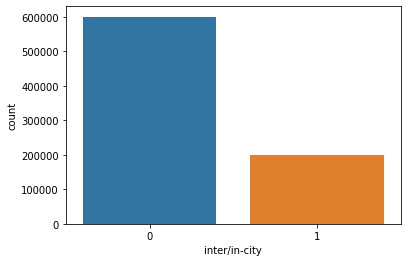

In [25]:
sns.countplot(x='inter/in-city', data=markers_hebrew)
# Count of injured per inter/in-city

inter/in-city
0    0.751402
1    0.248598
Name: provider_and_id, dtype: float64


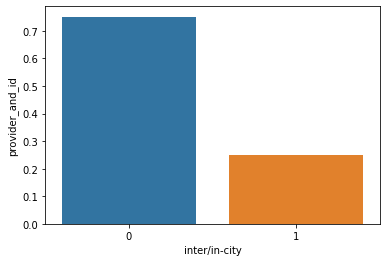

In [28]:
total_accidents = markers_hebrew.shape[0]
distr_percentage = markers_hebrew.groupby('inter/in-city')['provider_and_id'].count() / total_accidents
print(distr_percentage)
sns.barplot(x=distr_percentage.index, y=distr_percentage)
# Count of injured per inter/in-city normalized

## Count of injured: per geo resolution/radius

In [29]:
news_flash = pd.read_csv('../data/news_flash.csv')
news_flash.head().T

,0,1,2,3,4
id,16907,16922,16938,3450,16953
accident,True,True,True,True,True
author,איתי בלומנטל ורענן בן צור,מגן דוד אדום,יניר יגנה,רענן בן צור,שלומי גבאי
date,2020-02-03 14:36,2020-02-03 16:28,2020-02-03 20:36,2019-05-24 11:01,2020-02-03 17:05
description,אישה כבת 50 נפצעה באורח קשה בתאונת דרכים בין ש...,NaN,אישה כבת 60 נפצעה היום (שני) באורח בינוני ואי...,בית משפט השלום בפתח תקווה האריך בשלושה ימים את...,"גבר בן 42 נפצע היום (שני) באורח קשה, ושניים נ..."
lat,32.0548,32.0526,31.3794,31.951,32.4798
link,"http://www.ynet.co.il/articles/0,7340,L-567124...",https://twitter.com/mda_israel/status/12243663...,https://news.walla.co.il/item/3338808,"http://www.ynet.co.il/articles/0,7340,L-551461...",https://news.walla.co.il/item/3338775
lon,34.8338,34.7666,34.8713,34.8881,35.1477
title,שני פצועים קשה ובינוני בתאונת דרכים סמוך למחלף...,"בשעה 16:28 התקבל דיווח במוקד 101 של מד""א במרחב...",אישה בת 60 נפצעה בינוני בתאונה ליד קיבוץ להב ש...,הוארך מעצרו של חשוד בתאונה באתר בנייה אתמול בלוד,גבר 42 נפצע קשה ושניים נוספים בינוני בתאונה לי...
source,ynet,twitter,walla,ynet,walla


In [ ]:
def plot_based_on_radius(accident_df, coordinates):
    # Accepts input (lat, lng) to be used as the center of the radius
    
    